Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Example 11.30

Face recognition via nearest neighbor using a low-dimensional representation obtained via principal component analysis\
Topics and relevant videos: [Principal component analysis](https://www.youtube.com/watch?v=hPM7F2CP9vQ), [dimensionality reduction, nearest neighbor](https://www.youtube.com/watch?v=ODMRtd3dj7s) 

Author: Carlos Fernandez-Granda

In [11]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
np.set_printoptions(precision=2)

font_size = 15
font_size_small = 8
font_size_legend = 15
font_size_ticks = 15

data = fetch_olivetti_faces()
identities = data.target
faces = data.images.reshape((len(data.images), -1))
image_shape=(64,64)

In [3]:
indices_test = np.arange(9,400,10)
indices_train = np.setdiff1d(np.arange(0,400,1), indices_test, assume_unique=False)

training_set = faces[indices_train,:]
train_labels = identities[indices_train]
test_set = faces[indices_test,:]
test_labels = identities[indices_test]
n_test = len(test_labels)

In [4]:
# Principal component analysis
mean_face = np.mean(training_set, axis=0)
sample_covariance_matrix = np.cov(training_set.T)
eigvals,U = np.linalg.eig(sample_covariance_matrix)
U = np.real(U) # Principal directions

In [5]:
errors = []
k_max = 100
for k in np.arange(k_max):

    # k first principal components for each face
    pcs_train = (training_set - mean_face) @ U[:,:k]
    pcs_test = (test_set - mean_face) @ U[:,:k]
    
    errors_k = 0
    
    for ind in range(n_test):
        
        closest_ind = np.argmin(np.sum((pcs_test[ind,:]-pcs_train)**2,axis=1))
        estimated_label = train_labels[closest_ind]
        if estimated_label != test_labels[ind]:
            errors_k += 1
    # print('Number of principal components:',k+1)
    # print("Errors:",errors_k)        
    errors.append(errors_k)

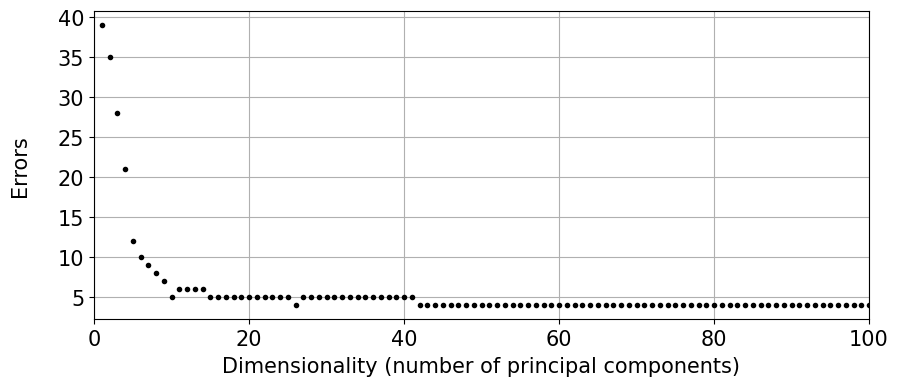

In [6]:
plt.figure(figsize=(10,4))
plt.plot(np.arange(1,len(errors)+1,1),errors,"o",markersize=2,markerfacecolor='black',markeredgecolor="black",
         markeredgewidth=2)
plt.xlabel(r"Dimensionality (number of principal components)",fontsize=font_size,labelpad = 5)
plt.ylabel(r'Errors',fontsize=font_size,labelpad = 20)
plt.xticks(fontsize=font_size_ticks)
plt.yticks(fontsize=font_size_ticks)
plt.xlim([0,100])
plt.grid(True)

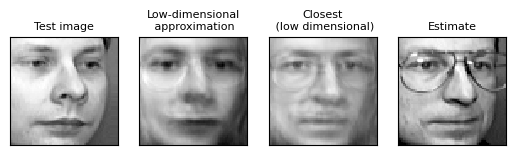

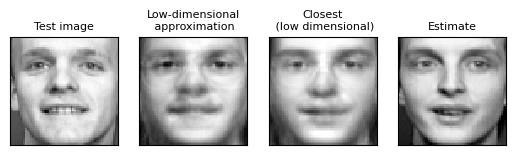

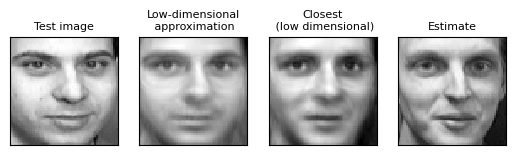

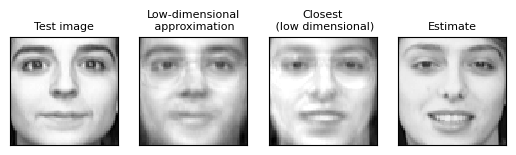

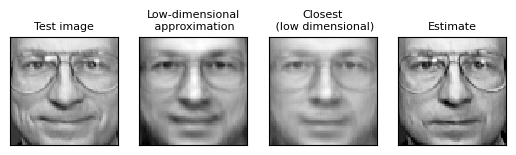

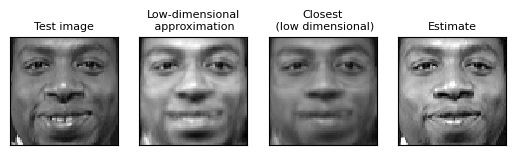

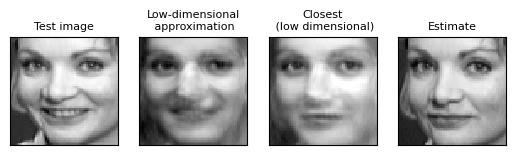

In [13]:
k = 42 - 1
pcs_train = (training_set - mean_face) @ U[:,:k]
pcs_test = (test_set - mean_face) @ U[:,:k]

indices = [3,4,8,9,12,21,34]

for ind in indices:
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    test_face = test_set[ind,:]
    closest_ind = np.argmin(np.sum((pcs_test[ind,:]-pcs_train)**2,axis=1))
    estimated_label = train_labels[closest_ind]
    
    closest = training_set[closest_ind,:]
    test_approx = mean_face + pcs_test[ind] @ U[:,:k].T
    closest_approx = mean_face + pcs_train[closest_ind] @ U[:,:k].T
    
    ax1.imshow(test_face.reshape(image_shape), cmap=plt.cm.gray, #cmap=plt.cm.gray_r,
                   interpolation='nearest',
                   vmin=test_face.min(), vmax=test_face.max())
    ax1.set_xticks(())
    ax1.set_yticks(())
    ax1.set_title('Test image',fontsize=font_size_small)
    
    ax2.imshow(test_approx.reshape(image_shape), cmap=plt.cm.gray, #cmap=plt.cm.gray_r,
                   interpolation='nearest',
                   vmin=test_approx.min(), vmax=test_approx.max())
    ax2.set_xticks(())
    ax2.set_yticks(())
    ax2.set_title('Low-dimensional\n approximation',fontsize=font_size_small)
    
    ax3.imshow(closest_approx.reshape(image_shape), cmap=plt.cm.gray, #cmap=plt.cm.gray_r,
                   interpolation='nearest',
                   vmin=closest.min(), vmax=closest.max())
    ax3.set_xticks(())
    ax3.set_yticks(())
    ax3.set_title('Closest\n (low dimensional)',fontsize=font_size_small)
    
    ax4.imshow(closest.reshape(image_shape), cmap=plt.cm.gray, #cmap=plt.cm.gray_r,
                   interpolation='nearest',
                   vmin=closest_approx.min(), vmax=closest_approx.max())
    ax4.set_xticks(())
    ax4.set_yticks(())
    ax4.set_title('Estimate',fontsize=font_size_small)